In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#import neattext.functions as nfx
import plotly.express as plx
from sklearn.metrics import classification_report
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
#from keras.preprocessing.text import Tokenizer
from tqdm import tqdm

In [3]:
data = pd.read_csv(
    'Suicide_Detection.csv',
    encoding='unicode_escape',  # Keep your encoding fix
    usecols=[0, 1, 2],         # Select only columns 0, 1, 2
    dtype=str,                  # Treat all columns as strings to avoid mixed-type warnings
    low_memory=False           # Suppress DtypeWarning
)
data.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I__ so lostHello, my name is Adam (16) and I__...",suicide


In [4]:
# Filter the data to include only 'suicide' and 'non-suicide'
filtered_data = data[data['class'].isin(['suicide', 'non-suicide'])]

# Get the counts of 'suicide' and 'non-suicide'
class_counts = filtered_data['class'].value_counts()
print(class_counts)

class
suicide        116034
non-suicide    116019
Name: count, dtype: int64


In [17]:
# Find the minimum count between 'suicide' and 'non-suicide'
min_count = min(class_counts)

suicide_data = filtered_data[filtered_data['class'] == 'suicide'].sample(n=min_count, random_state=42)
non_suicide_data = filtered_data[filtered_data['class'] == 'non-suicide'].sample(n=min_count, random_state=42)
balanced_data = pd.concat([suicide_data, non_suicide_data], axis=0)
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_data['class'].value_counts())


class
suicide        116019
non-suicide    116019
Name: count, dtype: int64


In [18]:
filtered_data['class'].value_counts().index.values

array(['suicide', 'non-suicide'], dtype=object)

In [19]:
# First split: 80% training, 20% temporary (for validation + testing)
train_data, test_data = train_test_split(filtered_data, test_size=0.2, random_state=10)

In [20]:
print(f"Training: {len(train_data)/len(data):}")
print(f"Testing: {len(test_data)/len(data):}")

Training: 0.7975991510240558
Testing: 0.19940193597449635


In [21]:
train_data['class'].value_counts().index.values

array(['suicide', 'non-suicide'], dtype=object)

<ipython-input-22-d0d3440702d8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette=['red', 'blue'])


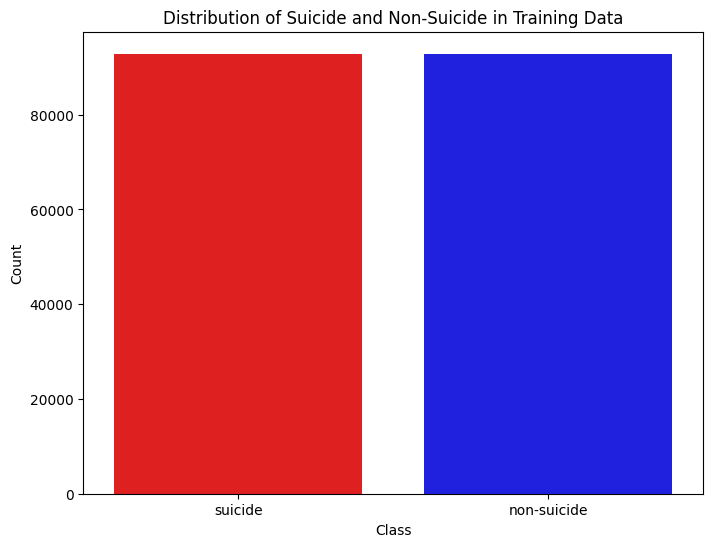

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the counts of 'suicide' and 'non-suicide' in the training data
class_counts = train_data['class'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette=['red', 'blue'])

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Suicide and Non-Suicide in Training Data')

# Show the plot
plt.show()

In [23]:
!pip install neattext
import neattext.functions as nfx
def clean_text(text):
    text_length=[]
    cleaned_text=[]
    for sent in tqdm(text):
        sent=sent.lower()
        sent=nfx.remove_special_characters(sent)
        sent=nfx.remove_stopwords(sent)
        text_length.append(len(sent.split()))
        cleaned_text.append(sent)
    return cleaned_text,text_length

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 2.1 MB/s eta 0:00:00


In [25]:
cleaned_train_text,train_text_length=clean_text(train_data.text)
cleaned_test_text,test_text_length=clean_text(test_data.text)


100%|██████████| 46411/46411 [00:02<00:00, 19598.60it/s]


In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer=Tokenizer()
tokenizer.fit_on_texts(cleaned_train_text)
cleaned_train_text

['maybe kill myself19 horrible luck past 2 years worst ive trying progress bullshit happens family member dies kicked college program attending funeral emotional stress deal hs credits troubled teen emotional abuse later try reenroll wasted semester trying reenroll failing attempts bullshit happening lose job false accusations 2 attempted robberys gang kids threatening kill telling kill girlfriend abuses emotionally physically cheated dude tinder moved away stuck toxic family manipulative relative dad multi millionaire pretends dont exist tried use tax fraud attractive gained weight gym year dealing ptsd found basically ptsd life child abuse truamatic memories 3 lol dont know anymore feels like life meaning 6 feet point genius level intellect death sparked curiosity bad beedit forgot mention car accident friend dying',
 'got crushs number months talking ig finally got number youre debating chance person like pussy know far simple hey',
 'fucking mosquitoes talking gf decided sleep woke

In [33]:
from keras.preprocessing.sequence import pad_sequences
train_text_seq=tokenizer.texts_to_sequences(cleaned_train_text)
train_text_pad=pad_sequences(train_text_seq,maxlen=50)

test_text_seq=tokenizer.texts_to_sequences(cleaned_test_text)
test_text_pad=pad_sequences(test_text_seq,maxlen=50)

In [34]:
train_text_pad

array([[13354, 10959,  6760, ...,   928,    48,   390],
       [    0,     0,     0, ...,   228,   888,   442],
       [    0,     0,     0, ...,  4570,  6712, 39925],
       ...,
       [    0,     0,     0, ...,   119,  1097,    16],
       [    0,     0,     0, ...,  1123,  1876,   882],
       [  341, 84900,   419, ...,  2089,  2141,   337]], dtype=int32)

In [36]:
test_text_pad

array([[    0,     0,     0, ...,    79,     1,   169],
       [ 1235,   669,   137, ...,   450,  2504,   262],
       [    0,     0,     0, ...,  8967,  1490, 16209],
       ...,
       [    0,     0,     0, ...,   300,  2311,   658],
       [    0,     0,     0, ...,  3123,   155,   487],
       [    0,     0,     0, ...,    28,  1630,   503]], dtype=int32)

In [38]:
# Extract labels from the dataset
train_labels = train_data['class'].apply(lambda x: 1 if x == 'suicide' else 0)
test_labels = test_data['class'].apply(lambda x: 1 if x == 'suicide' else 0)

In [39]:
print("Train Labels Distribution:")
print(train_labels.value_counts())

print("\nTest Labels Distribution:")
print(test_labels.value_counts())

Train Labels Distribution:
class
1    92866
0    92776
Name: count, dtype: int64

Test Labels Distribution:
class
0    23243
1    23168
Name: count, dtype: int64


In [41]:
# Flatten the padded sequences
train_features = train_text_pad.reshape(train_text_pad.shape[0], -1)
test_features = test_text_pad.reshape(test_text_pad.shape[0], -1)

print("Train features shape:", train_features.shape)
print("Test features shape:", test_features.shape)

Train features shape: (185642, 50)
Test features shape: (46411, 50)


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import time
from tqdm import tqdm

In [44]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Measure training time
start_time = time.time()
rf_classifier.fit(train_features, train_labels)
training_time = time.time() - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Measure test prediction time
start_time = time.time()
test_preds = rf_classifier.predict(test_features)
test_prediction_time = time.time() - start_time
print(f"Test Prediction Time: {test_prediction_time:.2f} seconds")

test_accuracy = accuracy_score(test_labels, test_preds)
print("Test Accuracy:", test_accuracy)
print("Classification Report (Test):\n", classification_report(test_labels, test_preds))

Training Time: 134.61 seconds
Test Prediction Time: 1.56 seconds
Test Accuracy: 0.8082782099071341
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.81      0.81      0.81     23243
           1       0.81      0.81      0.81     23168

    accuracy                           0.81     46411
   macro avg       0.81      0.81      0.81     46411
weighted avg       0.81      0.81      0.81     46411



In [ ]:
# Flatten the padded sequences
train_features = train_text_pad.reshape(train_text_pad.shape[0], -1)
val_features = val_text_pad.reshape(val_text_pad.shape[0], -1)
test_features = test_text_pad.reshape(test_text_pad.shape[0], -1)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Measure training time with progress bar
start_time = time.time()

# Train the model with a progress bar
for i in tqdm(range(100), desc="Training Progress", unit="tree"):
    rf_classifier.n_estimators = i + 1
    rf_classifier.fit(train_features, train_labels)

training_time = time.time() - start_time
print(f"\nTraining Time: {training_time:.2f} seconds")

# Measure test prediction time with progress bar
start_time = time.time()

# Predict on the test set with progress bar
test_preds = []
for sample in tqdm(test_features, desc="Test Prediction", unit="sample"):
    test_preds.append(rf_classifier.predict([sample]))

test_prediction_time = time.time() - start_time
print(f"\nTest Prediction Time: {test_prediction_time:.2f} seconds")

# Evaluate the model
val_accuracy = accuracy_score(val_labels, val_preds)
print("Validation Accuracy:", val_accuracy)
print("Classification Report (Validation):\n", classification_report(val_labels, val_preds))

test_accuracy = accuracy_score(test_labels, test_preds)
print("Test Accuracy:", test_accuracy)
print("Classification Report (Test):\n", classification_report(test_labels, test_preds))

Training Progress: 100%|██████████| 100/100 [1:43:37<00:00, 62.18s/tree] 



Training Time: 6217.95 seconds


Validation Prediction: 100%|██████████| 46410/46410 [06:47<00:00, 113.86sample/s]



Validation Prediction Time: 407.60 seconds


Test Prediction: 100%|██████████| 23206/23206 [03:24<00:00, 113.54sample/s]



Test Prediction Time: 204.39 seconds
Validation Accuracy: 0.8068088773971127
Classification Report (Validation):
               precision    recall  f1-score   support

           0       0.81      0.81      0.81     23256
           1       0.81      0.81      0.81     23154

    accuracy                           0.81     46410
   macro avg       0.81      0.81      0.81     46410
weighted avg       0.81      0.81      0.81     46410

Test Accuracy: 0.8065586486253555
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.81      0.80      0.81     11635
           1       0.80      0.81      0.81     11571

    accuracy                           0.81     23206
   macro avg       0.81      0.81      0.81     23206
weighted avg       0.81      0.81      0.81     23206

